# Poverty Mapping with Predicted Values

In [1]:
#Install libraries for geospatial data wrangling and analysis

#Geopandas for wrangling
!pip install geopandas


#Contextily for basemap plotting 
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip3 install contextily==1.0rc2


     |████████████████████████████████| 931kB 9.4MB/s 
     |████████████████████████████████| 10.9MB 9.8MB/s 
     |████████████████████████████████| 14.7MB 341kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 0s (2,087 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...


In [6]:
#Connect to Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import geopandas
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily

#Load cluster data
import pandas as pd
clusters_df = pd.read_csv('/content/drive/My Drive/Thesis/DHS_Data/bangladesh_cluster_avg_asset_2013_updated_new.csv')
clusters_df = geopandas.GeoDataFrame(clusters_df, geometry = geopandas.points_from_xy(clusters_df.longitude, clusters_df.latitude))
clusters_df.tail()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry
594,595,596,1.757480,U,24.900228,91.871489,POINT (91.87149 24.90023)
595,596,597,1.591590,U,24.904567,91.887165,POINT (91.88716 24.90457)
596,597,598,2.281590,U,24.886183,91.887103,POINT (91.88710 24.88618)
597,598,599,-0.042325,U,24.893073,91.906950,POINT (91.90695 24.89307)
598,599,600,1.242605,U,24.875934,91.895091,POINT (91.89509 24.87593)


In [0]:
import os
import pickle

os.chdir('/content/drive/My Drive/Thesis/Predicted_XGB_OSMNLGHT')

with open('predicted', 'rb') as fp:
  predicted = pickle.load(fp)


In [9]:
clusters_df.head()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry
0,0,1,-0.831240,R,21.965697,90.126312,POINT (90.12631 21.96570)
1,1,2,-0.739180,R,22.221232,90.348908,POINT (90.34891 22.22123)
2,2,3,-0.786210,R,22.191484,90.212539,POINT (90.21254 22.19148)
3,3,4,-0.447090,R,22.185481,90.167023,POINT (90.16702 22.18548)
4,4,5,-0.687435,R,22.311173,90.149822,POINT (90.14982 22.31117)


In [10]:
len(predicted)

599

In [0]:
clusters_df['wealth_predicted'] = predicted

In [12]:
!pip install mapclassify

     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for mapclassify: filename=mapclassify-2.2.0-cp36-none-any.whl size=47028 sha256=6c66bba4f5a2c179cc69f821d7e5787a19e56e0680558241687eb40f112bf40f
  Stored in directory: /root/.cache/pip/wheels/96/0c/c1/b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
Successfully built mapclassify


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


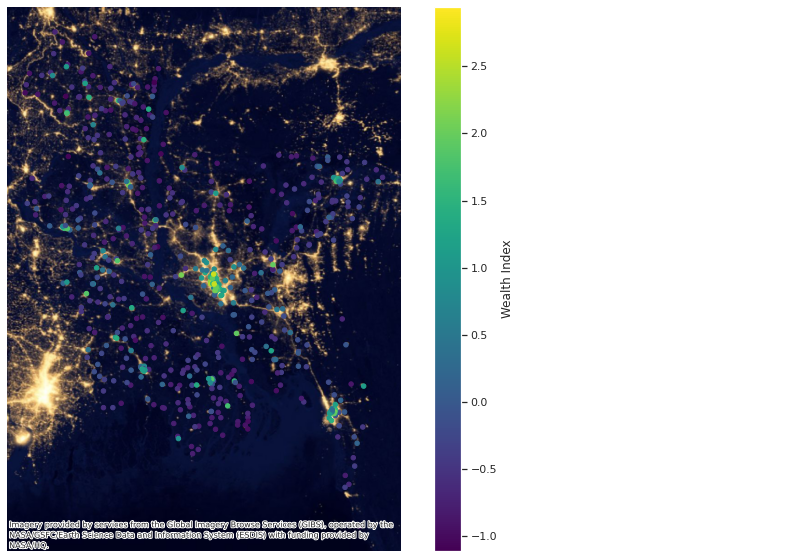

In [59]:
clusters_df.crs = {'init' :'epsg:4326'}
#clusters_dfcopy.to_crs({'init': 'epsg:3395'})
lgnd_kwds = {'label': 'Wealth Index'}

#fig, ax = plt.subplots(figsize=(12, 10))
#plt.xlim(88, 93)
#plt.ylim(20, 28)
#clusters_df = clusters_df.to_crs(epsg=3857)
# ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, scheme='QUANTILES', k=4, figsize=(12, 10), markersize = 20)
ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, legend_kwds = lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='viridis')
#roads_plot = roads_df.plot(ax = ax)
contextily.add_basemap(ax_clusters, url=contextily.providers.NASAGIBS.ViirsEarthAtNight2012)
# contextily.add_basemap(ax_clusters)

ax_clusters.set_axis_off()
plt.show()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


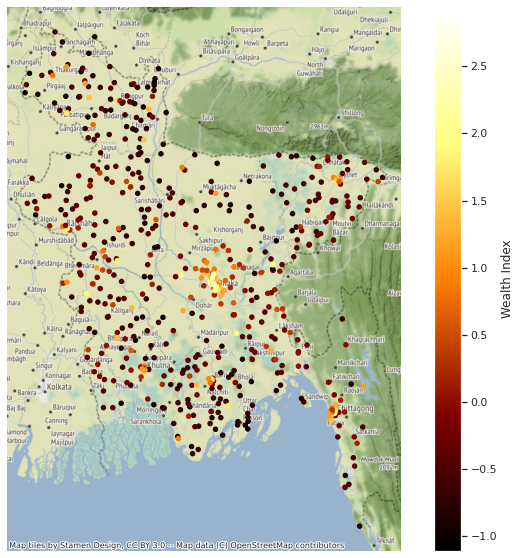

In [54]:
clusters_df.crs = {'init' :'epsg:4326'}
#clusters_dfcopy.to_crs({'init': 'epsg:3395'})
lgnd_kwds = {'label': "Wealth Index",}

#fig, ax = plt.subplots(figsize=(12, 10))
#plt.xlim(88, 93)
#plt.ylim(20, 28)
#clusters_df = clusters_df.to_crs(epsg=3857)
# ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, scheme='QUANTILES', k=3, figsize=(12, 10), markersize = 20)
ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, legend_kwds = lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='afmhot')
#roads_plot = roads_df.plot(ax = ax)
contextily.add_basemap(ax_clusters)
# contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
plt.show()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


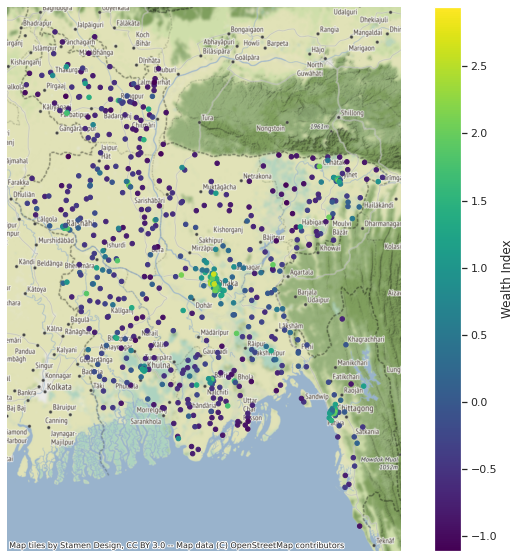

In [60]:
clusters_df.crs = {'init' :'epsg:4326'}
#clusters_dfcopy.to_crs({'init': 'epsg:3395'})
lgnd_kwds = {'label': "Wealth Index",}

#fig, ax = plt.subplots(figsize=(12, 10))
#plt.xlim(88, 93)
#plt.ylim(20, 28)
#clusters_df = clusters_df.to_crs(epsg=3857)
# ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, scheme='QUANTILES', k=3, figsize=(12, 10), markersize = 20)
ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wlthindf', legend=True, legend_kwds = lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='viridis')
#roads_plot = roads_df.plot(ax = ax)
contextily.add_basemap(ax_clusters)
# contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


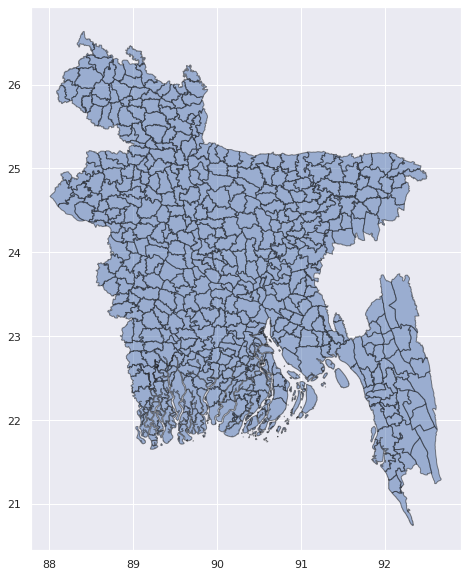

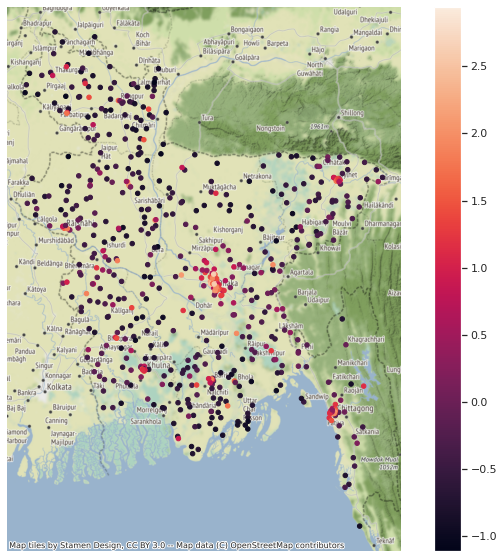

In [21]:
import seaborn as sns
sns.set()
admin_polygon.crs = {'init' :'epsg:3857'}
admin_polygon.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax_clusters = clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, figsize=(12, 10), markersize = 20)
#roads_plot = roads_df.plot(ax = ax)
contextily.add_basemap(ax_clusters)
# contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
plt.show()
# plt.scatter(x=clusters_df.latitude, y=clusters_df.longitude, c = 'black')

# Show the plot

In [16]:
dhs_df = geopandas.read_file('/content/drive/My Drive/Thesis/DHS_Data/DHS_Shapefile/BDGE71FL.shp')
dhs_df.head()

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,BD201400000001,BD,2014.0,1.0,BG,BG85,Barisal,NULL,NULL,1.0,Barisal,1.0,Barisal,GPS,R,21.965697,90.126312,9999.0,7.0,WGS84,POINT (90.12631 21.96570)
1,BD201400000002,BD,2014.0,2.0,BG,BG85,Barisal,NULL,NULL,1.0,Barisal,1.0,Barisal,GPS,R,22.221232,90.348908,9999.0,4.0,WGS84,POINT (90.34891 22.22123)
2,BD201400000003,BD,2014.0,3.0,BG,BG85,Barisal,NULL,NULL,1.0,Barisal,1.0,Barisal,GPS,R,22.191484,90.212539,9999.0,4.0,WGS84,POINT (90.21254 22.19148)
3,BD201400000004,BD,2014.0,4.0,BG,BG85,Barisal,NULL,NULL,1.0,Barisal,1.0,Barisal,GPS,R,22.185481,90.167023,9999.0,9.0,WGS84,POINT (90.16702 22.18548)
4,BD201400000005,BD,2014.0,5.0,BG,BG85,Barisal,NULL,NULL,1.0,Barisal,1.0,Barisal,GPS,R,22.311173,90.149822,9999.0,10.0,WGS84,POINT (90.14982 22.31117)


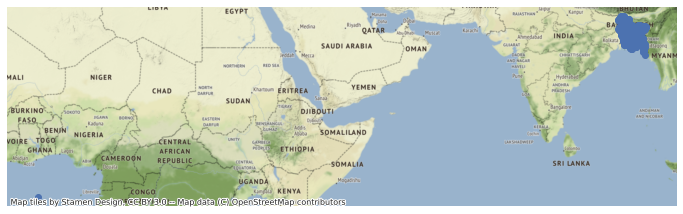

In [22]:
ax = dhs_df.to_crs(epsg=3857).plot(figsize=(12,10), legend = True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [23]:
admin_polygon = geopandas.read_file('/content/drive/My Drive/Thesis/DHS_Data/Polygons/BGD_adm3.shp')
admin_polygon.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,20,BGD,Bangladesh,1,Barisal,1,Barisal,1,Agailjhara,Upazila|Thana|Po,Sub-district,None,None,"POLYGON ((90.13228 23.02925, 90.13877 23.03056..."
1,20,BGD,Bangladesh,1,Barisal,1,Barisal,2,Babuganj,Upazila|Thana|Po,Sub-district,None,None,"POLYGON ((90.27067 22.73984, 90.26520 22.74118..."
2,20,BGD,Bangladesh,1,Barisal,1,Barisal,3,Bakerganj,Upazila|Thana|Po,Sub-district,None,None,"MULTIPOLYGON (((90.35285 22.61147, 90.35315 22..."
3,20,BGD,Bangladesh,1,Barisal,1,Barisal,4,Banaripara,Upazila|Thana|Po,Sub-district,None,None,"POLYGON ((90.19837 22.78146, 90.19374 22.78425..."
4,20,BGD,Bangladesh,1,Barisal,1,Barisal,5,Barisal S.,Upazila|Thana|Po,Sub-district,None,None,"MULTIPOLYGON (((90.31945 22.66389, 90.31913 22..."


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


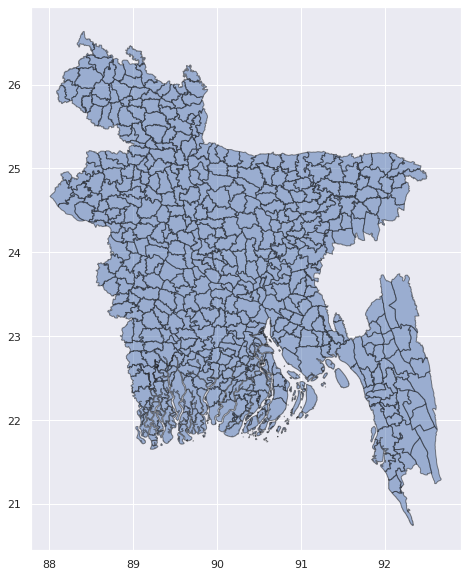

In [24]:
sns.set()
admin_polygon.crs = {'init' :'epsg:3857'}
ax = admin_polygon.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# plt.scatter(x=clusters_df.latitude, y=clusters_df.longitude, c = 'black')

# Show the plot
plt.show()

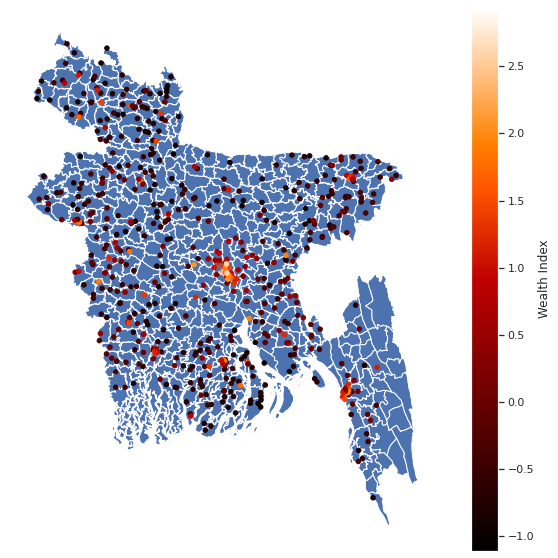

In [55]:
fig, ax = plt.subplots(figsize=(12, 10))
lgnd_kwds = {'label': 'Wealth Index'}

bangladesh_plot = admin_polygon.plot(ax = ax)
clusters_plot = clusters_df.plot(ax = ax, column = 'wealth_predicted', legend=True, legend_kwds = lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='gist_heat')
#contextily.add_basemap(ax_clusters)
ax.set_axis_off()
plt.show()

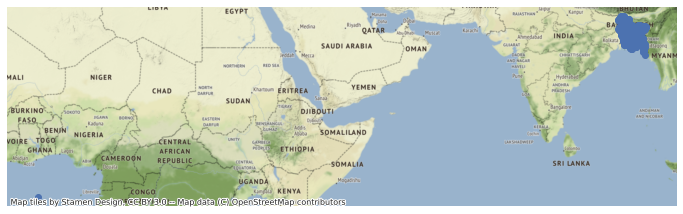

In [25]:
dhs_df = geopandas.read_file('/content/drive/My Drive/Thesis/DHS_Data/DHS_Shapefile/BDGE71FL.shp')
ax = dhs_df.to_crs(epsg=3857).plot(figsize=(12,10), legend = True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [0]:

poly_list = []
for point in dhs_df.geometry: 
  for poly in admin_polygon.geometry: 
    if point.within(poly):
      poly_list.append(poly)

In [33]:
len(poly_list)

596

In [0]:
new_clusters_df = clusters_df.copy()
new_clusters_df = new_clusters_df.drop([596,597,598], axis=0)
new_clusters_df['geometry'] = poly_list

In [42]:
clusters_df.tail()

,Unnamed: 0,cluster,wlthindf,URBAN_RURA,latitude,longitude,geometry,wealth_predicted
594,595,596,1.757480,U,24.900228,91.871489,POINT (91.87149 24.90023),1.524269
595,596,597,1.591590,U,24.904567,91.887165,POINT (91.88716 24.90457),1.280556
596,597,598,2.281590,U,24.886183,91.887103,POINT (91.88710 24.88618),1.320471
597,598,599,-0.042325,U,24.893073,91.906950,POINT (91.90695 24.89307),1.093388
598,599,600,1.242605,U,24.875934,91.895091,POINT (91.89509 24.87593),0.647239


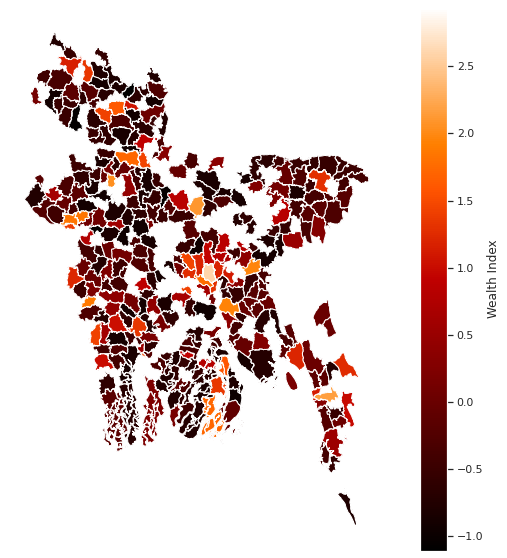

In [56]:
# fig, ax = plt.subplots(figsize=(12, 10))
lgnd_kwds = {'label': 'Wealth Index'}

ax_clusters = new_clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, legend_kwds=lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='gist_heat')
#roads_plot = roads_df.plot(ax = ax)
# contextily.add_basemap(ax_clusters)
# contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
# plt.imshow(cmap='viridis', interpolation='nearest')
plt.show()


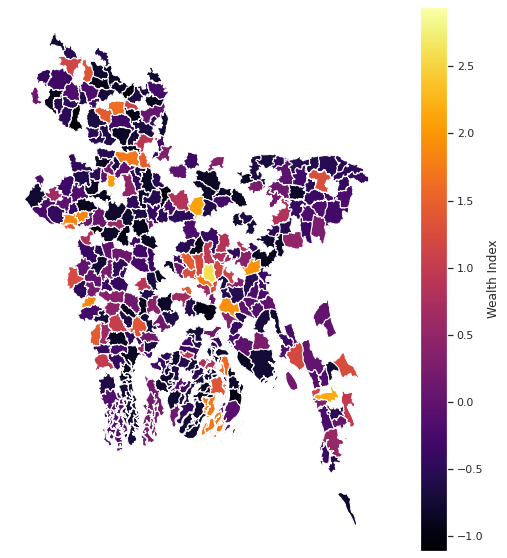

In [58]:
# fig, ax = plt.subplots(figsize=(12, 10))
lgnd_kwds = {'label': 'Wealth Index'}

ax_clusters = new_clusters_df.to_crs(epsg=3857).plot(column = 'wealth_predicted', legend=True, legend_kwds=lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='inferno')
#roads_plot = roads_df.plot(ax = ax)
# contextily.add_basemap(ax_clusters)
# contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
# plt.imshow(cmap='viridis', interpolation='nearest')
plt.show()


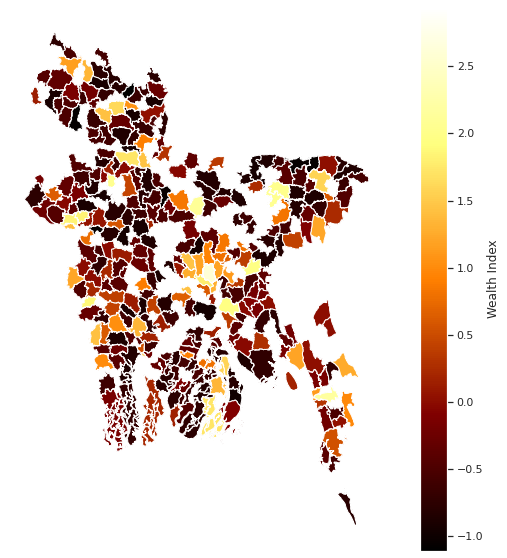

In [52]:
# fig, ax = plt.subplots(figsize=(12, 10))
lgnd_kwds = {'label': 'Wealth Index'}

ax_clusters = new_clusters_df.to_crs(epsg=3857).plot(column = 'wlthindf', legend=True, legend_kwds=lgnd_kwds, figsize=(12, 10), markersize = 20, cmap='afmhot')
#roads_plot = roads_df.plot(ax = ax)
# contextily.add_basemap(ax_clusters)
# contextily.add_basemap(ax_clusters)
ax_clusters.set_axis_off()
# plt.imshow(cmap='viridis', interpolation='nearest')
plt.show()
